### Bayes Decision Boundary

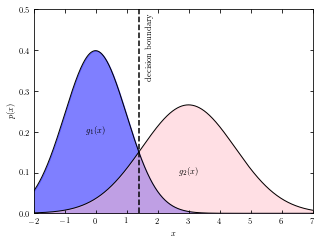

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


# Compute the two PDFs
x = np.linspace(-3, 7, 1000)
pdf1 = norm(0, 1).pdf(x)
pdf2 = norm(3, 1.5).pdf(x)
x_bound = x[np.where(pdf1 < pdf2)][0]

# Plot the pdfs and decision boundary
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.plot(x, pdf1, '-k', lw=1)
ax.fill_between(x, pdf1, color='blue', alpha = 0.5)

ax.plot(x, pdf2, '-k', lw=1)
ax.fill_between(x, pdf2, color='pink', alpha= 0.5)


# plot decision boundary
ax.plot([x_bound, x_bound], [0, 0.5], '--k')

ax.text(x_bound + 0.2, 0.49, "decision boundary",
        ha='left', va='top', rotation=90)

ax.text(0, 0.2, '$g_1(x)$', ha='center', va='center')
        
ax.text(3, 0.1, '$g_2(x)$', ha='center', va='center')

ax.set_xlim(-2, 7)
ax.set_ylim(0, 0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

plt.show()

### Simple Gaussian Naive Bayes Classification

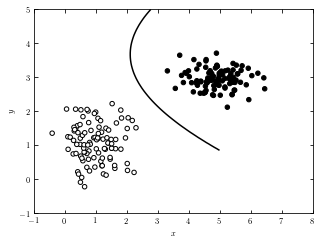

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.naive_bayes import GaussianNB


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

 
# Simulate some data
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                   np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1

# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# Predict the classification probabilites on a grid
xlim = (-1, 8)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], ylim[1], 71),
                    np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary, zorder=2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

completeness [0.48175182 0.68613139 0.81021898 0.87591241]
contamination [0.85201794 0.79295154 0.80143113 0.79020979]


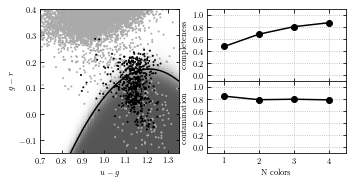

In [7]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]     # rearrange columns for better 1-color results.
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                    random_state=0)

N_tot = len(y)
N_st = np.sum(y==0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

# Perform Naive Bayes
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

order = np.array([1, 0, 2, 3])

for nc in Ncolors:
    clf = GaussianNB()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])
    
    classifiers.append(clf)
    predictions.append(y_pred)
    
completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 81),
                     np.linspace(ylim[0], ylim[1], 71))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# Plot the results
fig = plt.figure(figsize = (5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                   left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# Plot completeness vs Ncolors
ax = plt.subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# Plot contamination vs Ncolors
ax = plt.subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

### Linear Discriminant Analysis Classification of photometry

completeness [0.48175182 0.67153285 0.67153285 0.67153285]
contamination [0.85300668 0.80590717 0.80467091 0.80590717]


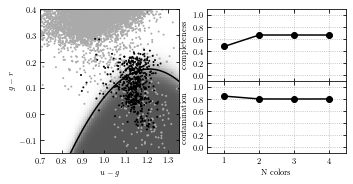

In [10]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]    #rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                    random_state = 0)

N_tot = len(y)
N_st = np.sum(y==0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

# Perform LinearDiscriminant Analysis
classifier = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])
    
    classifiers.append(clf)
    predictions.append(y_pred)
    
completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                    np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)



# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')

ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

### Quadratic Discriminant Analysis classification of Photometry

completeness [0.48175182 0.68613139 0.73722628 0.78832117]
contamination [0.85201794 0.79249448 0.77555556 0.75675676]


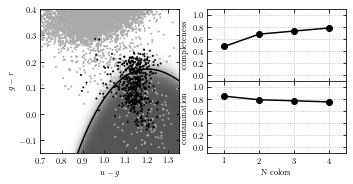

In [11]:

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform QuadraticDiscriminantAnalysis
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])
    
    classifiers.append(clf)
    predictions.append(y_pred)
    
predicitons = np.array(predictions)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', c='k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', c='k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')

ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

### Gausian Mixture Bayes Classification of photometry

@pickle_results: computing results and saving to 'GMMbayes_rrlyrae.pkl'
completeness [[0.48175182 0.68613139 0.73722628 0.78832117]
 [0.         0.11678832 0.43065693 0.68613139]]
contamination [[0.85201794 0.79249448 0.77605322 0.75675676]
 [0.         0.33333333 0.14492754 0.21666667]]


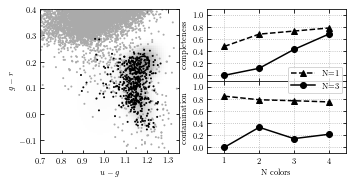

In [12]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from astroML.classification import GMMBayes
from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results


(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)
N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform GMM Bayes
Ncolors = np.arange(1, X.shape[1] + 1)
Ncomp = [1, 3]

@pickle_results('GMMbayes_rrlyrae.pkl')
def compute_GMMbayes(Ncolors, Ncom):
    classifiers = []
    predictions = []
    
    for ncm in Ncomp:
        classifiers.append([])
        predictions.append([])
        
        for nc in Ncolors:
            clf = GMMBayes(ncm, tol=1E-5, covariance_type='full')
            clf.fit(X_train[:, :nc], y_train)
            y_pred = clf.predict(X_test[:, :nc])
            
            classifiers[-1].append(clf)
            predictions[-1].append(y_pred)
            
    return classifiers, predictions

classifiers, predictions = compute_GMMbayes(Ncolors, Ncomp)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, completeness[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, contamination[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.78))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

completeness [[0.22627737 0.3649635  0.46715328 0.54014599]
 [0.00729927 0.23357664 0.40145985 0.53284672]]
contamination [[0.78014184 0.53271028 0.44347826 0.41732283]
 [0.875      0.44827586 0.24657534 0.23958333]]


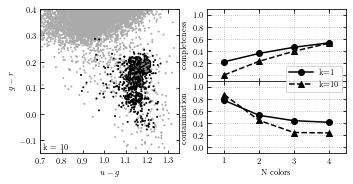

In [14]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.neighbors import KNeighborsClassifier
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform Classification

classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
kvals = [1, 10]

for k in kvals:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])
        
        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)
        
completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.02, 0.02, "k = %i" % kvals[1],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)

ax.plot(Ncolors, completeness[0], 'o-k', ms=6, label='k=%i' % kvals[0])
ax.plot(Ncolors, completeness[1], '^--k', ms=6, label='k=%i' % kvals[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], 'o-k', ms=6, label='k=%i' % kvals[0])
ax.plot(Ncolors, contamination[1], '^--k', ms=6, label='k=%i' % kvals[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

### Logistic Regression of Photometry

completeness [0.98540146 1.         1.         1.        ]
contamination [0.88588335 0.84180139 0.84088269 0.84014002]
[-10.35625743]
[[-24.22780633  15.09174567]]


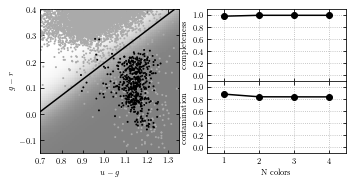

In [15]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.linear_model import LogisticRegression
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform Classification
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = LogisticRegression(class_weight = 'balanced')
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])
    
    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

print(clf.intercept_)
print(clf.coef_)

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)

ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()


### SVM Diagram

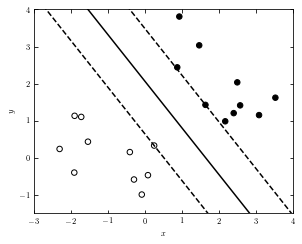

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Create the data
np.random.seed(1)

N1 = 10
N2 = 10
mu1 = np.array([0,0])
mu2 = np.array([2.0, 2.0])

Cov1 = np.array([[1, -0.5],
               [-0.5, 1]])
Cov2 = Cov1

X = np.vstack([np.random.multivariate_normal(mu1, Cov1, N1),
              np.random.multivariate_normal(mu2, Cov2, N2)])
y = np.hstack([np.zeros(N1), np.ones(N2)])

# Perform an SVM classification
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

xx = np.linspace(-5, 5)
w = clf.coef_[0]
m = -w[0] / w[1]
b = -clf.intercept_[0] / w[1]
yy = m * xx + b

 # find support vectors
i1 = np.argmax(np.dot(X[:N1], w))
i2 = N1 +np.argmin(np.dot(X[N1:], w))

db1 = X[i1, 1] - (m * X[i1, 0] + b)
db2 = X[i2, 1] - (m * X[i2, 0] + b)

# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111, aspect='equal')

ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.binary)
ax.plot(xx, yy, '-k')
ax.plot(xx, yy + db1, '--k')
ax.plot(xx, yy + db2, '--k')

ax.set_ylim(-1.5, 4)
ax.set_xlim(-3, 4)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

### SVM Classification of Photometry

@pickle_results: computing results and saving to 'kernelSVM_rrlyrae.pkl'
completeness [1. 1. 1. 1.]
contamination [0.90108303 0.83901293 0.83573141 0.81561238]


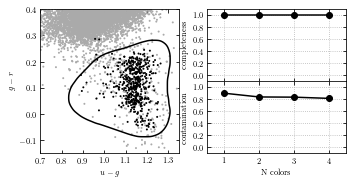

In [22]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics

from astroML.datasets import fetch_rrlyrae_mags
from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]

(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# Fit Kernel SVM
Ncolors = np.arange(1, X.shape[1] + 1)

@pickle_results('kernelSVM_rrlyrae.pkl')
def compute_SVM(Ncolors):
    classifiers = []
    predictions = []
    
    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='rbf', gamma=20.0, class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])
        
        classifiers.append(clf)
        predictions.append(y_pred)
        
    return classifiers, predictions

classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101),
                     np.linspace(ylim[0], ylim[1], 101))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

# smooth the boundary
from scipy.ndimage import gaussian_filter
Z = gaussian_filter(Z, 2)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()


### Decision Tree Classification of Photometry

completeness [[0.00729927 0.3649635  0.29927007 0.62773723]
 [0.02189781 0.31386861 0.51824818 0.57664234]]
contamination [[0.66666667 0.375      0.31666667 0.31746032]
 [0.625      0.48809524 0.37719298 0.3875969 ]]


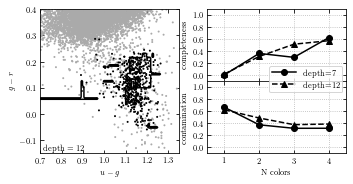

In [24]:

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)
N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# Fit Decision tree
Ncolors = np.arange(1, X.shape[1] + 1)

classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
depths = [7, 12]

for depth in depths:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = DecisionTreeClassifier(random_state=0, max_depth = depth,
                                    criterion='entropy')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])
        
        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)
        
completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary

clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101),
                     np.linspace(ylim[0], ylim[1], 101))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.02, 0.02, "depth = %i" % depths[1],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness[0], 'o-k', ms=6, label="depth=%i" % depths[0])
ax.plot(Ncolors, completeness[1], '^--k', ms=6, label="depth=%i" % depths[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], 'o-k', ms=6, label="depth=%i" % depths[0])
ax.plot(Ncolors, contamination[1], '^--k', ms=6, label="depth=%i" % depths[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

### Phtometric Redshift by Decision Trees

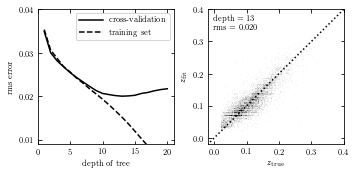

In [27]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from astroML.datasets import fetch_sdss_specgals

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Fetch data and prepare it for the computation
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 separate points
mag_test = mag[1::100]
z_test = z[1::100]

#------------------------------------------------------------
# Compute the cross-validation scores for several tree depths
depth = np.arange(1, 21)
rms_test = np.zeros(len(depth))
rms_train = np.zeros(len(depth))
i_best = 0
z_fit_best = None

for i, d in enumerate(depth):
    clf = DecisionTreeRegressor(max_depth=d, random_state=0)
    clf.fit(mag_train, z_train)
    
    z_fit_train = clf.predict(mag_train)
    z_fit = clf.predict(mag_test)
    rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
    rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))
    
    if rms_test[i] <= rms_test[i_best]:
        i_best = i
        z_fit_best = z_fit
        
best_depth = depth[i_best]

# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# first panel: cross-validation
ax = fig.add_subplot(121)
ax.plot(depth, rms_test, '-k', label='cross-validation')
ax.plot(depth, rms_train, '--k', label='training set')
ax.set_xlabel('depth of tree')
ax.set_ylabel('rms error')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.set_xlim(0, 21)
ax.set_ylim(0.009,  0.04)
ax.legend(loc=1)

# second panel: best-fit results
ax = fig.add_subplot(122)
edges = np.linspace(z_test.min(), z_test.max(), 101)
H, zs_bins, zp_bins = np.histogram2d(z_test, z_fit_best, bins=edges)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', 
           extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]],
           cmap=plt.cm.binary)
ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.04, 0.96, "depth = %i\nrms = %.3f" % (best_depth, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm fit}$')

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

### Photometric Redshift Random Forest

@pickle_results: computing results and saving to 'photoz_boosting.pkl'


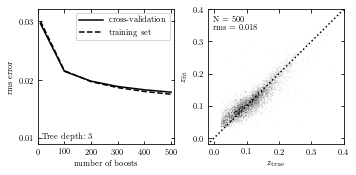

In [31]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]

# Compute the results
@pickle_results('photoz_boosting.pkl')
def compute_photoz_forest(N_boost):
    rms_test = np.zeros(len(N_boosts))
    rms_train = np.zeros(len(N_boosts))
    i_best = 0
    z_fit_best = None
    
    for i, Nb in enumerate(N_boosts):
        try:
            clf = GradientBoostingRegressor(n_estimators=Nb, max_depth=3, 
                                            random_state=0)
        except TypeError:
            clf = GradientBoostingRegressor(n_estimators=Nb, max_depth=3, 
                                            random_state=0)
        clf.fit(mag_train, z_train)
        
        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i]  = np.mean(np.sqrt((z_fit - z_test) ** 2))
        
        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit
            
    return rms_test, rms_train, i_best, z_fit_best

N_boosts = (10, 100, 200, 300, 400, 500)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(N_boosts)
best_N = N_boosts[i_best]

# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(N_boosts, rms_test, '-k', label='cross-validation')
ax.plot(N_boosts, rms_train, '--k', label='training set')
ax.legend(loc=1)

ax.set_xlabel('number of boosts')
ax.set_ylabel('rms error')
ax.set_xlim(0, 510)
ax.set_ylim(0.009,  0.032)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax.text(0.03, 0.03, "Tree depth: 3",
        ha='left', va='bottom', transform=ax.transAxes)

# right panel: plot best fit
ax = fig.add_subplot(122)
edges = np.linspace(z_test.min(), z_test.max(), 101)
H, zs_bins, zp_bins = np.histogram2d(z_test, z_fit_best, bins=edges)
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', 
           extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]],
           cmap=plt.cm.binary)

ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.04, 0.96, "N = %i\nrms = %.3f" % (best_N, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm fit}$')

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

### Neural Network

@pickle_results: computing results and saving to 'NNphotoz.pkl'
Epoch   0: train loss 1.603e-03 validation loss 1.092e-03
Finished training


/home/lokesh/.local/lib/python3.5/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


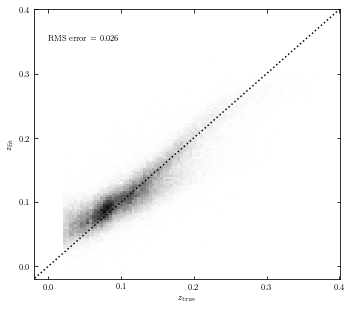

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as torchdata

from astroML.datasets import fetch_sdss_specgals
from astroML.utils.decorators import pickle_results

import matplotlib.pyplot as plt
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes into array
datanormed = np.zeros((len(data), 6), dtype=np.float32)
for i, band in enumerate(['u','g','r','i','z']):
    band = 'modelMag_' + band
    datanormed[:, i] = (data[band] - data[band].mean()) / data[band].std()
    
 #put redshifts into array
datanormed[:, 5] = data['z']

# define structure into array
datanormed[:, 5] = data['z']

# define structure of neural net
class Net(nn.Module):
    def __init__(self, nhidden):
        super(Net, self).__init__()
        self.fc_h = nn.Linear(5, nhidden)
        self.fc_o = nn.Linear(nhidden, 1)
        
    def forward(self, x):
        h = F.relu(self.fc_h(x))
        z = self.fc_o(h)
        return z
    
# Split data into 9:1 train:test
dataset = torchdata.TensorDataset(torch.tensor(datanormed[:, 0:5]),
                                 torch.tensor(datanormed[:, 5]).view(-1, 1))

trainnum = datanormed.shape[0] // 10 * 9
traindata, testdata = torchdata.random_split(dataset, [trainnum, datanormed.shape[0] - trainnum])
traindataloader = torchdata.DataLoader(traindata, batch_size=128, shuffle=True)


@pickle_results('NNphotoz.pkl')
def train_NN():
    model = Net(4)
    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True,
                                                          patience=5, threshold=1e-3)
    min_valid_loss = float('inf')
    badepochs = 0
    for t in range(1000):
        train_loss = 0
        for i, databatch in enumerate(traindataloader, 0):
            photometry, redshifts = databatch
            optimizer.zero_grad()
            z_pred = model(photometry)
            loss = criterion(z_pred, redshifts)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        with torch.no_grad():
            photometry = testdata[:][0]
            redshifts = testdata[:][1]
            z_pred = model(photometry)
            valid_loss = criterion(z_pred, redshifts)
            if t%10 == 0:
                print('Epoch %3i: train loss %0.3e validation loss %0.3e' % (t, \
                        train_loss / len(traindata), valid_loss / len(testdata)))
            # stop training if validation loss has not fallen in 10 epochs
            if valid_loss > min_valid_loss*(1-1e-3):
                badepochs += 1
            else:
                min_valid_loss = valid_loss
                badepochs += 1
            if badepochs == 10:
                print('Finished training')
                break
        
        scheduler.step(valid_loss)
    return model

model = train_NN()

# plot the results
with torch.no_grad():
    photometry = testdata[:][0]
    redshifts = testdata[:][1]
    z_pred = model(photometry)
    fig = plt.figure(figsize=(5, 5))
    fig.subplots_adjust(wspace=0.25,
                        left=0.1, right=0.95,
                        bottom=0.15, top=0.9)

    ax = plt.axes()
    #ax.scatter(redshifts, z_pred, s=1, lw=0, c='k')
    H, zs_bins, zp_bins = np.histogram2d(redshifts.numpy().flatten(), z_pred.numpy().flatten(), 151)
    ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
               extent=[zs_bins[0], zs_bins[-1], zp_bins[0], zp_bins[-1]],
               cmap=plt.cm.binary)
    ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
    rms = np.sqrt(np.mean((z_pred-redshifts).numpy()**2))
    ax.text(0, 0.35, 'RMS error = %0.3f' % np.sqrt(np.mean((z_pred-redshifts).numpy()**2)))
    ax.set_xlim(-0.02, 0.4001)
    ax.set_ylim(-0.02, 0.4001)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax.set_xlabel(r'$z_{\rm true}$')
    ax.set_ylabel(r'$z_{\rm fit}$')
    plt.show()

### Convolutional Neural Network

In [38]:
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.metrics import roc_curve

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

import random

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.ymargin'] = 0.05

def read_savefile(filename):
    return np.load(filename)

def CNN(imag_channels, imag_rows, img_cols, verbose = False):
    dropoutpar = 0.5
    nb_dense = 64
    
    model = Sequential()
    model.add(Convolution2D(32, 6, 6, border_mode = 'same',
                           input_shape=(img_rows, img_cols, img_channels)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Convolution2D(64, 5, 5, border_mode='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128, 5, 5, border_mode='same'))
    model.add(Activation='relu')
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128, 2, 2, border_mode='same'))
    model.add(Activation='relu')
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128, 3, 3, border_mode='same'))
    model.add(Activation='relu')
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(nb_dense, activation='relu'))
    model.add(Dropout(dropoutpar))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    print("Compilation...")
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
                 metrics=['accuracy'])
    print("...done!")
    if verbose is True:
        print("Model Summary")
        print("==================")
        model.summary()
    return model


def train_CNN(X, Y, ntrain, nval, output='test', verbose = False):
    batch_size = 30
    nb_epoch = 50
    data_augmentation = True
    
    ind = random.sample(range(0, ntrain+nval-1), ntrain+nval-1)
    X_train = X[ind[0:train], :, :, :, :]
    X_val = X[ind[0:ntrain]]
    Y_train = Y[ind[0:ntrain]]
    Y_val = Y[ind[ntrain:ntrain+nval]]
    
    # input image dimensions
    img_rows, img_cols = X_train.shape[1:3]
    img_channels = 3
    
    # Right shape for X
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,
                             img_channels)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, img_chanels)
    
    # Avoid more iterations once convergence
    patience_par = 10
    earlystopping = EarlyStopping(monitor='val_loss', patience=patience_par,
                                 verbose = 0, mode = 'auto')
    modelcheckpoint = ModelCheckpoint(output+"_best.hd5", monitor='val_loss',
                                     verbose = 0, save_best_only=True)
    
    # Define CNN
    model = CNN(img_channels, img_rows, img_cols, verbose = True)
    
    if not data_augmentation:
        print("Not using data augmentation.")
        history = model.fit(X_train, Y_train,
                           batch_size = batch_size,
                           nb_epoch=nb_epoch,
                           validation_data=(X_val, Y_val),
                           shuffle=True, verbose=verbose,
                           callbacks=[earlystopping, modelcheckpoint])
    else:
        datagen = ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 45,
            width_shift_range = 0.05,
            height_shift_range = 0.05,
            horizontal_flip = True,
            vertical_flip=True,
            zoom_range=[0.75, 1.3])

        datagen.fit(X_train)
        
        history = model.fit_generator(
            datagen.flow(X_train, Y_train, batch_size = batch_size),
            samples_per_epoch=X_train.shape[0],
            nb_epoch=nb_epoch,
            validation_data = (X_val, Y_val),
            callbacks=[earlystopping, modelcheckpoint])
        
    print("Saving model...")
    model.save_weights(output+".weights", overwrite=True)
    
    
def apply_CNN(x, model_name):
    img_rows, img_cols = X.shape[1:3]
    img_channels = 3
    X = X.reshpae(X.shape[0], img_rows, img_cols, img_channels)
    
    print("Loading weights", model_name)
    
    model = CNN(img_channels, img_rows, img_cols)
    model.load_weights(model_name+".weights")
    Y_pred = model.predict_proba(X)
    
    return Y_pred


def add_titlebox(ax, text):
    ax.text(.1, .85, text,
           horizontalalignment='left',
           transform=ax.transAxes,
           bbobx=dict(faecolor='white', edgecolor='none', alpha=0.8))
    return ax


def plot_CNN_performance(pred, labels):
    fig = plt.figure(figsize=(6, 3))
    fig.subplots_adjust(wspace=0.1, hspace=0.1,
                        left=0.1, right=0.95,
                        bottom=0.15, top=0.9)

    # define shape of figure
    gridsize = (2, 4)
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid(gridsize, (0, 2))
    ax3 = plt.subplot2grid(gridsize, (0, 3))
    ax4 = plt.subplot2grid(gridsize, (1, 2))
    ax5 = plt.subplot2grid(gridsize, (1, 3))

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(labels, pred)

    ax1.plot(fpr, tpr, color='black')
    ax1.set_xlabel(r'False Positive Rate')
    ax1.set_ylabel(r'True Positive Rate')

    # array of objects (good E, good S, bad E, bad S)
    goodE = np.where((pred[:, 0] < 0.5) & (labels == 0))
    goodS = np.where((pred[:, 0] > 0.5) & (labels == 1))
    badE = np.where((pred[:, 0] < 0.5) & (labels == 1))
    badS = np.where((pred[:, 0] > 0.5) & (labels == 0))

    ax2.imshow(D[pred_index + goodE[0][1]])
    add_titlebox(ax2, "Correct E")
    ax2.axis('off')

    ax3.imshow(D[pred_index + goodS[0][4]])
    add_titlebox(ax3, "Correct Spiral")
    ax3.axis('off')

    ax4.imshow(D[pred_index + badE[0][1]])
    add_titlebox(ax4, "Incorrect E")
    ax4.axis('off')

    ax5.imshow(D[pred_index + badS[0][3]])
    add_titlebox(ax5, "Incorrect Spiral")
    ax5.axis('off')

    plt.show()
    
    
n_objects = 500
save_files = "./SDSS{}".format(n_objects)

# Read SDSS images and labels
D = read_savefile("sdss_images_1000.npy")[0:n_objects]
Y = read_savefile("sdss_labels_1000.npy")[0:n_objects]

# Train network and output to disk (keep 10% of data for test sets)
ntrain = D.shape[0] * 8 // 10.
nval = D.shape[0] // 10
npred = D.shape[0] - (ntrain + nval)
pred_index = ntrain + nval

# Normalize images
mu = np.amax(D, axis=(1, 2))
for i in range(0, mu.shape[0]):
    D[i, :, :, 0] = D[i, :, :, 0] / mu[i, 0]
    D[i, :, :, 1] = D[i, :, :, 1] / mu[i, 1]
    D[i, :, :, 2] = D[i, :, :, 2] / mu[i, 2]
    
# change order so that we don not use alwasy the same objects to train/test
D, Y, = shuffle(D, Y, random_state = 0)

my_file = Path(save_files + ".weights")
if my_file.is_file():
    Y_pred = apply_CNN(D[pred_index:pred_index + npred, :, :, :], save_files)
    Y_test=U[pred_index:pred_index + npred]
else:
    print("Training Model")
    print("==================")
    model_name = train_CNN(D, Y, ntrain, nval, output = save_files)
    Y_pred = apply_CNN(D[pred_index:pred_index + npred, :, :, :], save_files)
    Y_test = Y[pred_index:pred_index + npred]
    
Y_pred_class = Y_red * 0
Y_pred_class[Y_pred > 0.05] = 1
print("Global Accuracy:", accuracy_score(Y_test, Y_pred_class))

plot_CNN_performance(Y_pred, Y_test)

FileNotFoundError: [Errno 2] No such file or directory: 'sdss_images_1000.npy'

#### Probalbly because I do not have these images

### Variational AutoEncoder

Epoch   0: train loss 2282.1 validation loss 1261.8
Epoch  10: train loss  409.4 validation loss  391.8
Epoch  20: train loss  239.2 validation loss  318.5
Epoch  30: train loss  174.9 validation loss  281.0
Epoch  40: train loss  144.5 validation loss  263.0
Epoch  50: train loss  128.6 validation loss  249.9
Epoch  60: train loss  138.0 validation loss  243.5
Epoch  70: train loss  101.0 validation loss  231.3
Epoch    77: reducing learning rate of group 0 to 1.0000e-05.
Epoch  80: train loss  131.6 validation loss  237.8
Epoch  90: train loss   97.2 validation loss  226.2
Epoch    95: reducing learning rate of group 0 to 1.0000e-06.
Epoch 100: train loss   96.5 validation loss  226.4
Epoch   101: reducing learning rate of group 0 to 1.0000e-07.
Epoch   107: reducing learning rate of group 0 to 1.0000e-08.
Epoch 110: train loss   96.2 validation loss  226.5
Epoch 120: train loss   96.4 validation loss  226.4
Epoch 130: train loss   96.4 validation loss  226.3
Epoch 140: train loss   

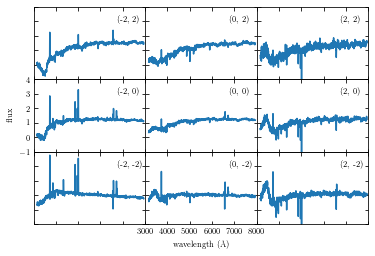

In [44]:
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as torchdata

from astroML.datasets import sdss_corrected_spectra

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex = True)

# Fetch and prepare the data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

# normalize spectra by integrated flux and subtract out mean, for easier training
spectranorms = np.mean(spectra, axis=1)
normedspectra = spectra / spectranorms[:, None]
meanspectrum = np.mean(normedspectra, axis=0)
normedspectra -= meanspectrum[None, :]

# split data into 3:1 train:test
torch.manual_seed(802)
dataset = torchdata.TensorDataset(torch.tensor(normedspectra))
trainnum = normedspectra.shape[0] // 4 * 3
traindata, testdata = torchdata.random_split(dataset, [trainnum, normedspectra.shape[0] - trainnum])
traindataloader = torchdata.DataLoader(traindata, batch_size=128, shuffle=True)

# Define structure of variation autoencoder
class VAE(nn.Module):
    def __init__(self, nhidden=250):
        super(VAE, self).__init__()
        
        self.encode_fc = nn.Linear(1000, nhidden)
        self.mu = nn.Linear(nhidden, 2)
        self.logvar = nn.Linear(nhidden, 2)
        
        self.decode_fc = nn.Linear(2, nhidden)
        self.output = nn.Linear(nhidden, 1000)
        
    def encode(self, x):
        h = F.relu(self.encode_fc(x))
        return self.mu(h), self.logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)
    
    def decode(self, z):
        h = F.relu(self.decode_fc(z))
        return self.output(h)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
    
    
# add KL divergence to loss function
def VAEloss(criterion, recon_x, x, mu, logvar):
    return criterion(recon_x, x) - 0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

def train_model():
    model = VAE()
    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=5, threshold=1e-3)
    
    min_valid_loss = float('inf')
    badepochs = 0
    for t in range(1000):
        train_loss = 0
        for i, databatch in enumerate(traindataloader, 0):
            specbatch = databatch[0]
            optimizer.zero_grad()
            recon, mu, logvar = model(specbatch)
            loss = VAEloss(criterion, recon, specbatch, mu, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        with torch.no_grad():
            testspec = testdata[:][0]
            recon, mu, logvar = model(testspec)
            valid_loss = VAEloss(criterion, recon, testspec, mu, logvar)
            if t % 10 == 0:
                print('Epoch %3i: train loss %6.1f validation loss %6.1f' % \
                            (t, train_loss / len(traindata), valid_loss / len(testdata)))
                # stop training if validation loss has not fallen in 10 epochs
                if valid_loss > min_valid_loss*(1-1e-3):
                    badepochs += 1
                else:
                    min_valid_loss = valid_loss
                    badepochs = 0
                if badepochs == 10:
                    print('finished training')
                    break
        scheduler.step(valid_loss)
    return model
    
model = train_model()


# plot results
with torch.no_grad():
    # sort latent parameters from most constrained to least constrained
    testspec = dataset[:][0]
    recon, mu, logvar = model(testspec)
    zorder = np.argsort(np.mean(logvar.numpy(), axis=0))

    fig = plt.figure()
    fig.subplots_adjust(hspace=0, wspace=0)
    parvalues = [-2.,0.,2.]
    for i, z1 in enumerate(parvalues):
        for j, z2 in enumerate(parvalues):
            # get z1 to vary left to right, z2 bottom to top
            ax = fig.add_subplot(3, 3, (2-j)*len(parvalues)+i+1)

            z = np.zeros((1,2), dtype=np.float32)
            z[0, zorder] = z1, z2 # set z1 is more constrained of the two latent parameters
            spectrum = model.decode(torch.tensor(z))
            ax.plot(wavelengths, meanspectrum+spectrum.numpy()[0,:])
            ax.text(6750, 3, '(%i, %i)' % (z1,z2))

            ax.set_xlim(3000, 8000)
            ax.set_ylim(-1, 4)

            if i == 0 and j == 1:
                ax.set_ylabel('flux')
            else:
                ax.yaxis.set_major_formatter(plt.NullFormatter())
            if j == 0 and i == 1:
                ax.set_xlabel(r'${\rm wavelength\ (\AA)}$')
            else:
                ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

### RR Lyrae ROC curves

GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GMMBayes


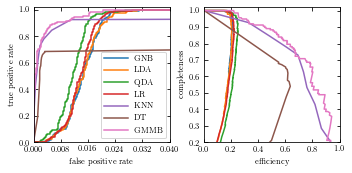

In [47]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes

from sklearn.metrics import roc_curve

from astroML.utils import split_samples, completeness_contamination
from astroML.datasets import fetch_rrlyrae_combined


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Get data and split into training and testing sets
X, y = fetch_rrlyrae_combined()
y = y.astype(int)
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                    random_state=0)

# Fit all the models to the training data
def compute_models(*args):
    names = []
    probs = []
    for classifier, kwargs in args:
        print(classifier.__name__)
        clf = classifier(**kwargs)
        clf.fit(X_train, y_train)
        y_probs = clf.predict_proba(X_test)[:, 1]
        
        names.append(classifier.__name__)
        probs.append(y_probs)
        
    return names, probs

names, probs = compute_models((GaussianNB, {}),
                             (LinearDiscriminantAnalysis, {}),
                              (QuadraticDiscriminantAnalysis, {}),
                              (LogisticRegression,
                               dict(class_weight='balanced')),
                              (KNeighborsClassifier,
                               dict(n_neighbors=10)),
                              (DecisionTreeClassifier,
                               dict(random_state=0, max_depth=12,
                                    criterion='entropy')),
                              (GMMBayes, dict(n_components=3, tol=1E-5,
                                              covariance_type='full')))

# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)

labels = dict(GaussianNB='GNB',
              LinearDiscriminantAnalysis='LDA',
              QuadraticDiscriminantAnalysis='QDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GMMBayes='GMMB',
              LogisticRegression='LR')

thresholds = np.linspace(0, 1, 1001)[:-1]

# iterate through and show results
for name, y_prob in zip(names, probs):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=labels[name])

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=labels[name])

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0.2, 1.02)

plt.show()


### Star/Quasar Classification of ROC Curve

GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GMMBayes


/home/lokesh/.local/lib/python3.5/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


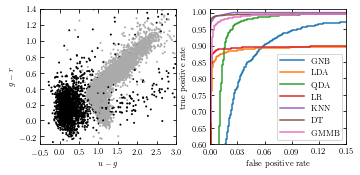

In [52]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils import split_samples

from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch data and split into training and test samples
from astroML.datasets import fetch_dr7_quasar
from astroML.datasets import fetch_sdss_sspp

quasars = fetch_dr7_quasar()
stars = fetch_sdss_sspp()

# Truncate data for speed
quasars = quasars[::5]
stars = stars[::5]

# stack colors into matrix X
Nqso = len(quasars)
Nstars = len(stars)
X = np.empty((Nqso + Nstars, 4), dtype = float)

X[:Nqso, 0] = quasars['mag_u'] - quasars['mag_g']
X[:Nqso, 1] = quasars['mag_g'] - quasars['mag_r']
X[:Nqso, 2] = quasars['mag_r'] - quasars['mag_i']
X[:Nqso, 3] = quasars['mag_i'] - quasars['mag_z']

X[Nqso:, 0] = stars['upsf'] - stars['gpsf']
X[Nqso:, 1] = stars['gpsf'] - stars['rpsf']
X[Nqso:, 2] = stars['rpsf'] - stars['ipsf']
X[Nqso:, 3] = stars['ipsf'] - stars['zpsf']

y = np.zeros(Nqso + Nstars, dtype = int)
y[:Nqso] = 1

# Split into training and test sets
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.9, 0.1],
                                                    random_state = 0)

# Compute fits for all the classifiers
def compute_results(*args):
    names = []
    probs = []
    
    for classifier, kwargs in args:
        print(classifier.__name__)
        model = classifier(**kwargs)
        model.fit(X, y)
        y_prob = model.predict_proba(X_test)
        
        names.append(classifier.__name__)
        probs.append(y_prob[:, 1])
        
    return names, probs

LRclass_weight = dict([(i, np.sum(y_train == i)) for i in (0, 1)])

names, probs = compute_results((GaussianNB, {}),
                               (LinearDiscriminantAnalysis, {}),
                               (QuadraticDiscriminantAnalysis, {}),
                               (LogisticRegression,
                                dict(class_weight=LRclass_weight)),
                               (KNeighborsClassifier,
                                dict(n_neighbors=10)),
                               (DecisionTreeClassifier,
                                dict(random_state=0, max_depth=12,
                                     criterion='entropy')),
                               (GMMBayes, dict(n_components=3, tol=1E-5,
                                               covariance_type='full')))

#------------------------------------------------------------
# Plot results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# First axis shows the data
ax1 = fig.add_subplot(121)
im = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=4,
                 linewidths=0, edgecolors='none',
                 cmap=plt.cm.binary)
im.set_clim(-0.5, 1)
ax1.set_xlim(-0.5, 3.0)
ax1.set_ylim(-0.3, 1.4)
ax1.set_xlabel('$u - g$')
ax1.set_ylabel('$g - r$')

labels = dict(GaussianNB='GNB',
              LinearDiscriminantAnalysis='LDA',
              QuadraticDiscriminantAnalysis='QDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GMMBayes='GMMB',
              LogisticRegression='LR')

# Second axis shows the ROC curves
ax2 = fig.add_subplot(122)
for name, y_prob in zip(names, probs):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax2.plot(fpr, tpr, label=labels[name])

ax2.legend(loc=4)
ax2.set_xlabel('false positive rate')
ax2.set_ylabel('true positive rate')
ax2.set_xlim(0, 0.15)
ax2.set_ylim(0.6, 1.01)
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()
